In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

import pandas as pd

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train.shape, test.shape

((8101, 21), (2026, 20))

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

In [65]:
train["Attrition_Flag"].value_counts()

Attrition_Flag
0    6815
1    1286
Name: count, dtype: int64

In [66]:
# baseline 
cols = train.select_dtypes(include='object').columns
cols

train.drop(cols, axis=1).shape

train = train.select_dtypes(exclude="object")
test = test.select_dtypes(exclude="object")

print(train.shape) 
print(test.shape)


(8101, 16)
(2026, 15)


In [67]:
train = train.drop("CLIENTNUM", axis=1)
test_id = test.pop("CLIENTNUM")

In [68]:
train.head(1)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,38,1,23,4,3,2,22149.0,987,21162.0,1.633,2409,36,0.8,0.045,0


In [69]:
test.head(1)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,43,2,37,4,3,0,6611.0,1041,5570.0,0.744,4037,74,0.682,0.157


In [70]:
test_id

0       788544108
1       719356008
2       712142733
3       789394833
4       742778358
          ...    
2021    787361583
2022    713474733
2023    708486033
2024    717683583
2025    712887633
Name: CLIENTNUM, Length: 2026, dtype: int64

In [71]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split 

# drop() axix=0 행을 기준으로 삭제, axis=1 열을 기준으로 삭제
X_tr, X_val, y_tr, y_val = train_test_split(
  train.drop("Attrition_Flag", axis=1), 
  train["Attrition_Flag"], 
  test_size=0.2, 
  random_state=2022

)

In [72]:
X_tr.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6806,50,1,30,1,3,2,14217.0,1816,12401.0,0.978,15554,99,0.678,0.128
5635,50,2,36,5,4,1,2428.0,2005,423.0,0.835,5170,68,0.659,0.826
2517,43,5,32,2,3,1,11508.0,0,11508.0,1.005,5242,74,0.574,0.000
2717,47,3,36,4,2,2,2926.0,0,2926.0,0.676,1304,24,0.846,0.000
3773,63,0,53,5,3,2,2271.0,1278,993.0,0.375,1550,33,0.650,0.563


In [73]:
# 모델 & 평가 
# 모델 불러오기 
# 학습 
# 예측 
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier() 

model.fit(X_tr, y_tr) 
pred = model.predict(X_val)

In [74]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

# 정확도 
print(accuracy_score(y_val, pred))

# 정밀도
print(precision_score(y_val, pred))

# 재현율(민감도)
print(recall_score(y_val, pred))

# F1 
print(f1_score(y_val, pred))

0.9673041332510796
0.9563318777292577
0.8358778625954199
0.8920570264765784


In [76]:
# roc-auc 
pred = model.predict_proba(X_val)
print(roc_auc_score(y_val, pred[:, 1]))

# baseline
from sklearn.preprocessing import LabelEncoder

for col in cols: 
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

train.head()

0.9895761364721478


KeyError: 'Gender'

In [78]:
import pandas as pd 

train = pd.read_csv("./data/2/train.csv")
test = pd.read_csv("./data/2/test.csv")
print(train.shape, test.shape)

(39116, 16) (9779, 15)


In [79]:
train.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35742633,Luxury new 1 bed apartment in East Williamsburg,265866685,Mindy,Brooklyn,Bushwick,40.69796,-73.92915,Entire home/apt,30,0,NaN,NaN,2,179,198
1,15840089,Kid- (and Adult-) Friendly Uptown 2-Bedroom,99602138,Yolanda,Manhattan,Washington Heights,40.83490,-73.94829,Entire home/apt,3,36,2019-01-01,1.13,1,5,150
2,24495605,Brooklyn Art Residence,75173477,Lara,Brooklyn,Bushwick,40.69932,-73.91191,Entire home/apt,3,7,2019-05-05,0.48,1,6,200


In [80]:
test.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34323697,Sonder | The Biltmore | Bright 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,NaN,NaN,327,338
1,29927138,A great space in NYC,158461160,Sophia,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,2019-05-31,0.75,6,284


In [81]:
train.isnull().sum()


id                                   0
name                                14
host_id                              0
host_name                           16
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       8053
reviews_per_month                 8053
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [82]:
test.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       1999
reviews_per_month                 1999
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

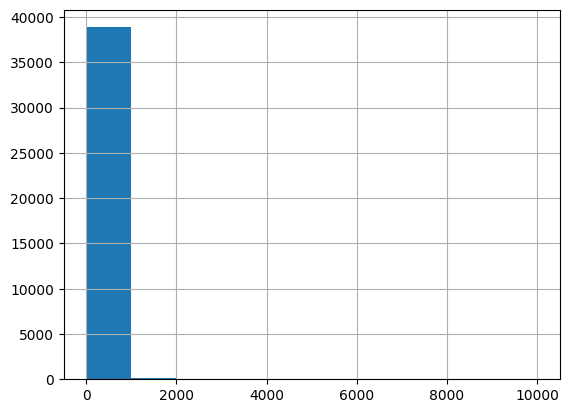

In [83]:
train["price"].hist()

In [84]:
train["price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39116 entries, 0 to 39115
Series name: price
Non-Null Count  Dtype
--------------  -----
39116 non-null  int64
dtypes: int64(1)
memory usage: 305.7 KB


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39102 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39100 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31063 non-null  object 
 12  reviews_per_month               

In [86]:
train.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [87]:
train.nunique()


id                                39116
name                              38447
host_id                           30821
host_name                          9943
neighbourhood_group                   5
neighbourhood                       221
latitude                          17378
longitude                         13607
room_type                             3
minimum_nights                       94
number_of_reviews                   377
last_review                        1720
reviews_per_month                   903
calculated_host_listings_count       47
availability_365                    366
price                               638
dtype: int64

In [88]:
cols = ["name", "host_name", "last_review", "host_id"]
train = train.drop(cols, axis=1)
test = test.drop(cols, axis=1)

print(test.shape)

(9779, 11)


In [89]:
train["reviews_per_month"] = train["reviews_per_month"].fillna(0)
test["reviews_per_month"] = test["reviews_per_month"].fillna(0)

In [90]:
train.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [92]:
train = train.drop("id", axis=1)

In [93]:
test_id = test.pop("id")

In [94]:
test_id

0       34323697
1       29927138
2         120362
3       31838301
4        7244824
          ...   
9774    15359119
9775    23565653
9776     9920191
9777     4792342
9778    22230294
Name: id, Length: 9779, dtype: int64

In [95]:
test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,0.00,327,338
1,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,0.75,6,284
2,Brooklyn,Williamsburg,40.70665,-73.94061,Entire home/apt,4,50,0.51,1,331
3,Brooklyn,Bedford-Stuyvesant,40.68427,-73.95460,Private room,1,18,3.33,1,16
4,Manhattan,Harlem,40.82028,-73.95381,Private room,1,3,0.08,1,0


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   neighbourhood                   39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   room_type                       39116 non-null  object 
 5   minimum_nights                  39116 non-null  int64  
 6   number_of_reviews               39116 non-null  int64  
 7   reviews_per_month               39116 non-null  float64
 8   calculated_host_listings_count  39116 non-null  int64  
 9   availability_365                39116 non-null  int64  
 10  price                           39116 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.3+ MB


In [97]:
train["neighbourhood_group"].nunique()

5

In [100]:
# cols = ["neighbourhood_group", "neighbourhood", "room_type"]
cols = list(train.select_dtypes(include = "object").columns)
from sklearn.preprocessing import LabelEncoder

for col in cols: 
  le = LabelEncoder() 
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

train[cols]


,neighbourhood_group,neighbourhood,room_type
0,1,28,0
1,2,206,0
2,1,28,0
3,1,214,0
4,1,13,0
...,...,...,...
39111,1,214,1
39112,2,94,1
39113,1,19,0
39114,1,41,0


In [102]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
  train.drop("price", axis=1), 
  train["price"], 
  test_size=0.15, 
  random_state=2022
)
X_tr.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
35316,2,73,40.70417,-74.01511,0,9,0,0.00,1,15
8181,2,94,40.80317,-73.95559,0,1,2,1.22,1,85
12102,1,30,40.63672,-73.88814,0,2,43,1.18,1,309
17438,1,91,40.72409,-73.95039,0,5,5,1.17,4,68
32851,2,103,40.85961,-73.92911,1,3,1,0.12,2,107


In [110]:
import numpy as np 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def rmse(y_test, y_pred): #RMSE 
  return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle(y_test, y_pred): # RMSLE 
  return np.sqrt(np.mean( np.power( np.log1p(y_test) - np.log1p(y_pred))))

def mape(y_test, y_pred): # MAPE 
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100



In [112]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_tr, y_tr)
pred = model.predict(X_val) 

print(r2_score(y_val, pred))
print("r2: ", r2_score(y_val, pred))
print("mae: ", mean_absolute_error(y_val, pred))
print("mse: ", mean_squared_error(y_val, pred))
print("rmse: ", rmse(y_val, pred))
print("rmsle: ", rmsle(y_val, pred))
print("mape: ", mape(y_val, pred))

0.08452239774949544
r2:  0.08452239774949544
mae:  73.98120907242381
mse:  44813.521129753666
rmse:  211.69204314228173


/var/folders/f3/y_01_cpx01zcsklhzncvbvjw0000gn/T/ipykernel_48155/417484428.py:9: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred))))


TypeError: power() takes from 2 to 3 positional arguments but 1 were given

In [113]:
import pandas as pd
train = pd.read_csv("./data/2files/train.csv")
test = pd.read_csv("./data/2files/test.csv")

In [114]:
train.head(2)

,id,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
1,124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1


In [115]:
test.head(2)

,id,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
1,28,65,0,2,140,417,1,0,157,0,0.8,2,1,2


In [116]:
train["output"].value_counts()

output
1    126
0    116
Name: count, dtype: int64

In [117]:
train.isnull().sum()

id          0
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [118]:
test.isnull().sum()

id          0
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

In [119]:
train.describe()

,id,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,154.706612,54.516529,0.673554,0.913223,131.070248,246.933884,0.119835,0.53719,149.590909,0.347107,1.019835,1.380165,0.785124,2.347107,0.520661
std,86.328576,9.021513,0.469885,1.020897,17.716978,52.236414,0.325441,0.53183,21.763201,0.477037,1.182137,0.621285,1.052218,0.607160,0.500608
min,0.000000,34.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.250000,47.250000,0.000000,0.000000,120.000000,212.000000,0.000000,0.00000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,158.500000,55.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.00000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,228.750000,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.00000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        242 non-null    int64  
 1   age       242 non-null    int64  
 2   sex       242 non-null    int64  
 3   cp        242 non-null    int64  
 4   trtbps    242 non-null    int64  
 5   chol      242 non-null    int64  
 6   fbs       242 non-null    int64  
 7   restecg   242 non-null    int64  
 8   thalachh  242 non-null    int64  
 9   exng      242 non-null    int64  
 10  oldpeak   242 non-null    float64
 11  slp       242 non-null    int64  
 12  caa       242 non-null    int64  
 13  thall     242 non-null    int64  
 14  output    242 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 28.5 KB


In [121]:
train.nunique()

id          242
age          40
sex           2
cp            4
trtbps       47
chol        139
fbs           2
restecg       3
thalachh     83
exng          2
oldpeak      38
slp           3
caa           5
thall         4
output        2
dtype: int64

### 데이터 전처리 & 피쳐 엔지니어링

In [123]:
train = train.drop("id", axis=1)
test_id = test.pop("id")

In [124]:
test.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,48,1,1,130,245,0,0,180,0,0.2,1,0,2
1,65,0,2,140,417,1,0,157,0,0.8,2,1,2
2,65,1,3,138,282,1,0,174,0,1.4,1,1,2
3,69,1,3,160,234,1,0,131,0,0.1,1,1,2
4,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [125]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
1,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
2,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
3,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
4,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


## 검증 데이터 분리

In [133]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
  train.drop("output", axis=1), 
  train["output"], 
  test_size=0.15, 
  random_state=2022
)
# print(X_tr.head())
print(X_val.head())

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
239   52    0   2     136   196    0        0       169     0      0.1    1   
197   42    1   3     148   244    0        0       178     0      0.8    2   
238   50    0   0     110   254    0        0       159     0      0.0    2   
171   37    0   2     120   215    0        1       170     0      0.0    2   
57    59    1   0     140   177    0        1       162     1      0.0    2   

     caa  thall  
239    0      2  
197    2      2  
238    0      2  
171    0      2  
57     1      3  


## 모델 & 평가

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score 

rf = RandomForestClassifier(random_state=2022, max_depth=5, n_estimators=400)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)
pred_proba = rf.predict_proba(X_val)

print(roc_auc_score(y_val, pred_proba[:, 1]))
print(f1_score(y_val, pred))
print(accuracy_score(y_val, pred))

# max_depth=3
# 0.9378881987577639
# 0.8636363636363636
# 0.8378378378378378

# max_depth=5
# 0.9409937888198757
# 0.8444444444444444
# 0.8108108108108109

# max_depth=7
# 0.9347826086956521
# 0.8444444444444444
# 0.8108108108108109

# max_depth는 3~12 
# n_estimators= 100 200 300 400 800 1000 (100 ~ 1000)

0.9409937888198757
0.8444444444444444
0.8108108108108109


## 에측 및 csv 제출

In [151]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(random_state=2022, max_depth=5, n_estimators=400, learning_rate=0.01)
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)
pred_proba = xgb.predict_proba(X_val)

print(roc_auc_score(y_val, pred_proba[:, 1]))
print(f1_score(y_val, pred))
print(accuracy_score(y_val, pred))

# 0.9192546583850931
# 0.8444444444444444
# 0.8108108108108109

# max_depth=5
# 0.906832298136646
# 0.8181818181818182
# 0.7837837837837838

# max_depth=7
# 0.9099378881987576
# 0.8181818181818182
# 0.7837837837837838

# n_estimator=200
# 0.9068322981366459
# 0.8181818181818182
# 0.7837837837837838

# n_estimator=400, learning_rate=0.01
# 0.9161490683229814
# 0.8372093023255814
# 0.8108108108108109

0.9161490683229814
0.8372093023255814
0.8108108108108109
